<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Derivatives_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [40]:
#model parameters
S0 =100   # stock price at time zero
k = 100.0 #  option strike price
T =1.0  # date of maturity in years
r = 0.05 # risk-free short rates
sigma = 0.2  # annual volatility
N = 4 # number of time intervals / no of steps


In [ ]:
# Time parameters
dt = T /N # Length of each tie interval


In [ ]:
R= math.exp(r * dt) # growth factor per interval
df = math.exp(-r*dt) # discount factor per  interest
print(df)

0.9875778004938814


In [ ]:
#Binomial Parameters
u = math.exp(sigma * math.sqrt(dt)) #upward movement
d = 1/u # down movement
p = (R-u)/(u-d)
print(u,d,p)

1.1051709180756477 0.9048374180359595 -0.46219162804358604


In [ ]:
#simulate terminal stock price
for i in reversed(range(N+1)):
  ST=S0*u**i*d**(N-1)
  print(i,ST)

4 110.5170918075648
3 100.00000000000001
2 90.48374180359596
1 81.87307530779817
0 74.08182206817177


In [ ]:
S = np.zeros((N+1,N+1))

In [ ]:
S

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
#Simulate stock price
# i:row index
# j: column index
for j in range(N+1):
  for i in range(j+1):
   S[j-i,j]=S0*u**i*d**(j-i)
   print(S[j-i,j])

100.0
90.48374180359595
110.51709180756477
81.87307530779817
100.0
122.14027581601701
74.08182206817177
90.48374180359595
110.51709180756478
134.98588075760034
67.0320046035639
81.87307530779817
100.0
122.14027581601701
149.1824697641271


In [ ]:
#Monte Carlo - Black-Scholes-Merton


In [2]:
pip install --upgrade pandas numpy pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but 

In [21]:
pip install pandas_datareader

In [17]:
pip install yfinance

In [55]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import  yfinance as yf


ticker = 'MSFT'
data = pd.DataFrame()
stock_data = yf.download(ticker, start='2000-01-01')


[*********************100%%**********************]  1 of 1 completed


In [60]:
pip install scipy

In [63]:
from scipy.stats import norm


AttributeError: ignored

In [36]:
adj_close_data = stock_data['Adj Close']

In [37]:
data[ticker] = adj_close_data

In [50]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [42]:
log_returns = np.log(1 + data.pct_change())

In [43]:
log_returns.tail()

,MSFT
Date,
2023-12-04,-0.014443
2023-12-05,0.009115
2023-12-06,-0.010036
2023-12-07,0.005813
2023-12-08,0.008803


In [44]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.304672
dtype: float64

In [45]:
r = 0.025
K = 110.0
T = 1

In [46]:
S = data.iloc[-1]
S

MSFT    374.230011
Name: 2023-12-08 00:00:00, dtype: float64

In [47]:
d1(S, K, r, stdev, T)

MSFT    4.25311
dtype: float64

In [48]:
d2(S, K, r, stdev, T)

MSFT    3.948438
dtype: float64

In [51]:
BSM(S, K, r, stdev, T)

NameError: ignored

In [1]:
#Derivative Pricing in Python
from math import exp, log, pi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-51839a1f8799>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def norm_pdf(x):
    return (1.0/((2*pi)**0.5))*exp(-0.5*x*x)

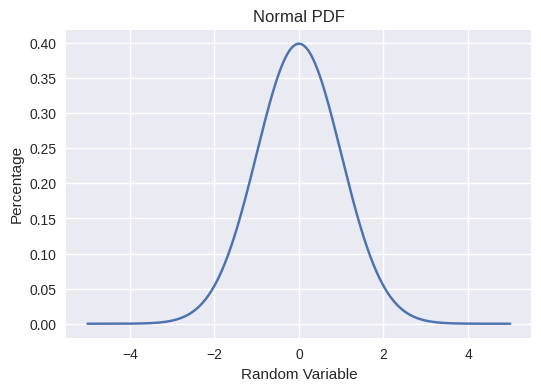

In [3]:
norm_pdf_dist = []
loop = []
for i in range(0,10000):
    j = i/1000 - 5
    loop.append(j)
    norm_pdf_dist.append(norm_pdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_pdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal PDF")
plt.show()

In [4]:
def norm_cdf(x):
    k = 1.0/(1.0+0.2316419*x)
    k_sum = k * (0.319381530 + k * (-0.356563782 + \
        k * (1.781477937 + k * (-1.821255978 + 1.330274429 * k))))

    if x >= 0.0:
        return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * x * x) * k_sum)
    else:
        return 1.0 - norm_cdf(-x)

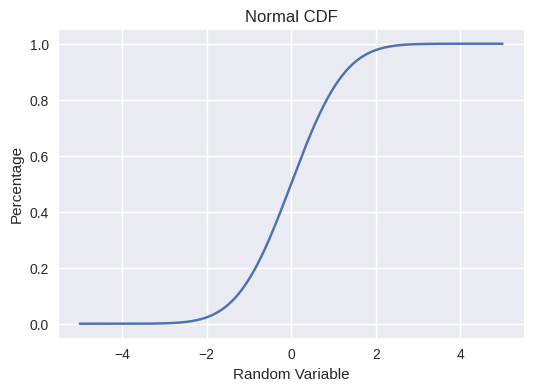

In [5]:
norm_cdf_dist = []
loop_cdf = []
for i in range(0,10000):
    j = i/1000 - 5
    loop_cdf.append(j)
    norm_cdf_dist.append(norm_cdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_cdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal CDF")
plt.show()

In [6]:
def d_j(j, S, K, r, v, T):
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

In [7]:
def vanilla_call_price(S, K, r, v, T):
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - \
        K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

def vanilla_put_price(S, K, r, v, T):
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + \
        K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

In [8]:
VCP = vanilla_call_price(100, 100, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 100, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 0.00010000667828080623
Put Price: 6.728288662327664e-09


In [ ]:
#Example 2 - Strike Price less than Underlying Value  (S<K)

In [9]:
VCP = vanilla_call_price(100, 50, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 50, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 50.000049999975
Put Price: 0.0


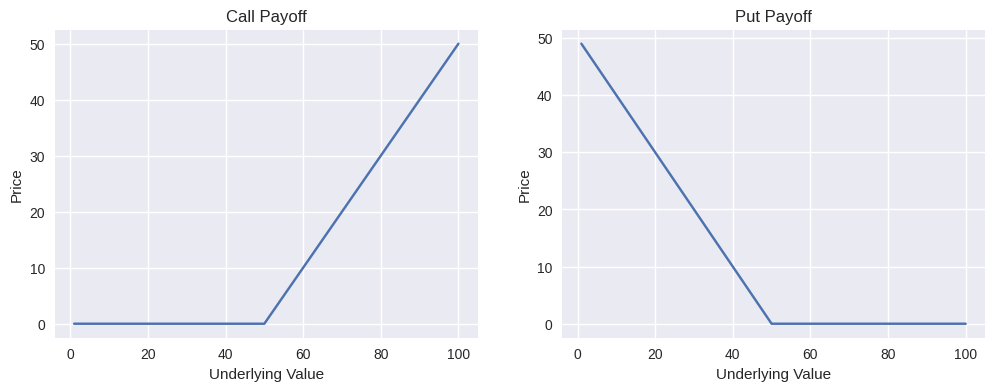

In [10]:
call_payoff = []
put_payoff = []
loop = []
for i in range(1,101):
    loop.append(i)
    call_payoff.append(vanilla_call_price(i, 50, 0.0000001, 0.0000001, 10))
    put_payoff.append(vanilla_put_price(i, 50, 0.0000001, 0.0000001, 10))

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x=loop, y=call_payoff, ax=ax[0])
sns.lineplot(x=loop, y=put_payoff, ax=ax[1])
ax[0].set(title="Call Payoff", xlabel="Underlying Value", ylabel="Price")
ax[1].set(title="Put Payoff", xlabel="Underlying Value", ylabel="Price")
plt.show()

<ipython-input-11-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_call_t = df_call_t.append({'{}%'.format(v):
<ipython-input-11-bf3e8d7b481e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_put_t = df_put_t.append({'{}%'.format(v):
<ipython-input-11-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_call_t = df_call_t.append({'{}%'.format(v):
<ipython-input-11-bf3e8d7b481e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_put_t = df_put_t.append({'{}%'.format(v):
<ipython-input-11-bf3e8d7b481e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

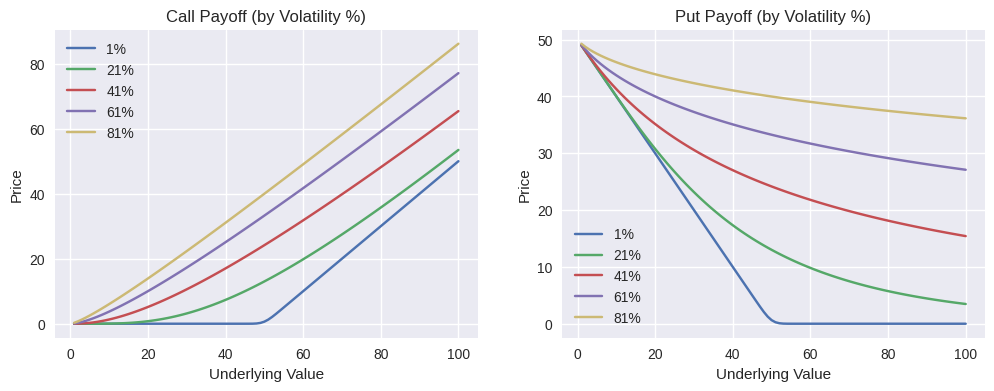

In [11]:
df_call = pd.DataFrame([])
df_put = pd.DataFrame([])
loop = range(1,101)
for v in range(1,101,20):
    sigma = v/100
    df_call_t = pd.DataFrame({'{}%'.format(v): []})
    df_put_t = pd.DataFrame({'{}%'.format(v): []})

    for i in range(1,101):
        df_call_t = df_call_t.append({'{}%'.format(v):
                                      vanilla_call_price(i, 50, 0.0000001, sigma, 10)},
                                     ignore_index=True)
        df_put_t = df_put_t.append({'{}%'.format(v):
                                    vanilla_put_price(i, 50, 0.0000001, sigma, 10)},
                                   ignore_index=True)

    df_call = pd.concat([df_call, df_call_t], axis=1, sort=False)
    df_put = pd.concat([df_put, df_put_t], axis=1, sort=False)

fig, ax = plt.subplots(1,2,figsize=(12,4))
for i in range(5):
    sns.lineplot(x=loop, y=df_call.iloc[:,i], label=df_call.columns.values[i], ax=ax[0])
    sns.lineplot(x=loop, y=df_put.iloc[:,i], label=df_put.columns.values[i], ax=ax[1])
    ax[0].set(title="Call Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[1].set(title="Put Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[0].legend()
    ax[1].legend()
plt.show()
